# Introduction
The dataset named 'Suppermarket sales' for this project was collected from kaggle: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

### <span style="color:blue"> Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation:</span>
-Main objective of the analysis is to focus on **prediction** . In this project, we will employ linear regression algorithms to find relationship between the features available in the dataset and predict the **gross income**:

# Read the data

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 
from sklearn.pipeline import Pipeline
from scipy.special import inv_boxcox


# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

filepath = "data/supermarket_sales.csv"
df_raw = pd.read_csv(filepath)

### <span style="color:blue">Brief description of the data set you chose and a summary of its attributes:</span>

In [2]:
df_raw.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Attribute information:

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

The target variable is 'Gross income'. 

In [3]:
df_raw.shape

(1000, 17)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df_raw.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [7]:
df_raw.describe(include='object').T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


# Clean the data
### <span style='color:blue'>Brief description of actions taken for data cleaning and feature engineering</span>
- Convert the data type of the features 'Date' and 'Time' from 'object' to 'datetime' data type.
- Rename the column names with space 
- Handle empty value.
- Set values of Quantity column to be mode. 
- Study the skewed distribution of the target feature 'gross income'. We will be apply log transformation to normalize the distribution of the target feature. 

In [8]:
df=df_raw.copy()

In [9]:
# convert Date and Time column from object type to date / time format
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'], format='%H:%M')

In [10]:
# rename columns
df.rename(columns={'Tax 5%': 'Tax', 'cogs': 'Cogs', 'Invoice ID': 'Invoice_ID', 'Customer type': 'Customer_Type', 'Product line': 'Product_Line', 'Unit price': 'Unit_Price', 'gross margin percentage': 'Gross_Margin_Percentage', 'gross income': 'Gross_Income'}, inplace = True)
df.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cogs,Gross_Margin_Percentage,Gross_Income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df.dtypes

Invoice_ID                         object
Branch                             object
City                               object
Customer_Type                      object
Gender                             object
Product_Line                       object
Unit_Price                        float64
Quantity                            int64
Tax                               float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
Cogs                              float64
Gross_Margin_Percentage           float64
Gross_Income                      float64
Rating                            float64
dtype: object

In [12]:
# Replace empty value with mean for column 'Unit_Price'
avg_unit_price = df['Unit_Price'].astype("float").mean(axis=0)
df['Unit_Price'].replace(np.nan, avg_unit_price, inplace=True)

In [13]:
# Use mode value for column 'Quantity'
mode=stats.mode(df['Quantity'])
df['Quantity'].replace(np.nan, "mode", inplace=True)

In [14]:
# For rest remaining values, just drop them
df.dropna(inplace=True)

In [15]:
df.isnull().sum() # Finally we can see No null values

Invoice_ID                 0
Branch                     0
City                       0
Customer_Type              0
Gender                     0
Product_Line               0
Unit_Price                 0
Quantity                   0
Tax                        0
Total                      0
Date                       0
Time                       0
Payment                    0
Cogs                       0
Gross_Margin_Percentage    0
Gross_Income               0
Rating                     0
dtype: int64

# EDA
### <span style="color:blue"> Brief summary of data exploration and actions taken</span>
- For numeric featuers, use heatmap to evaluate their correlation
- For categorical features, use counplot and bar plot to investigate their influence to gross income
- For datetime features, we will extract the value of Day and Hour by method of ().dt.day and ().dt.hour. The extracted values will be used to evaluate how the day and hour impacts gross income.

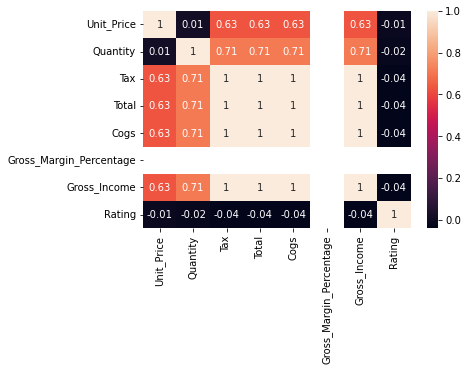

In [16]:
sales = df.select_dtypes(include='number')
np.round(sales.corr(),2)
plt.figure()
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

- There is strong correlation of 1 in between Tax, Total, Gross_Income and Cogs i.e Cost of Goods sold with a correlation of 1.

- The above variables mentioned all also have good correlation of 0.71 with Quantity and 0.63 with Unit_Price.

In [17]:
def draw_bar(ind, data, pal, title): 
    ax=sns.barplot(ind, data, palette=pal)
    for p in ax.patches:
        l = '{:.1f}'.format(round(p.get_height()))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(l, (x, y),ha='right')
        ax.set_title(title)

def draw_count(sales, title):
    ax = sns.countplot(x=sales,order=sales.value_counts(ascending=False).index);
    abs_values = sales.value_counts(ascending=False)
    rel_values = sales.value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title(title)

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

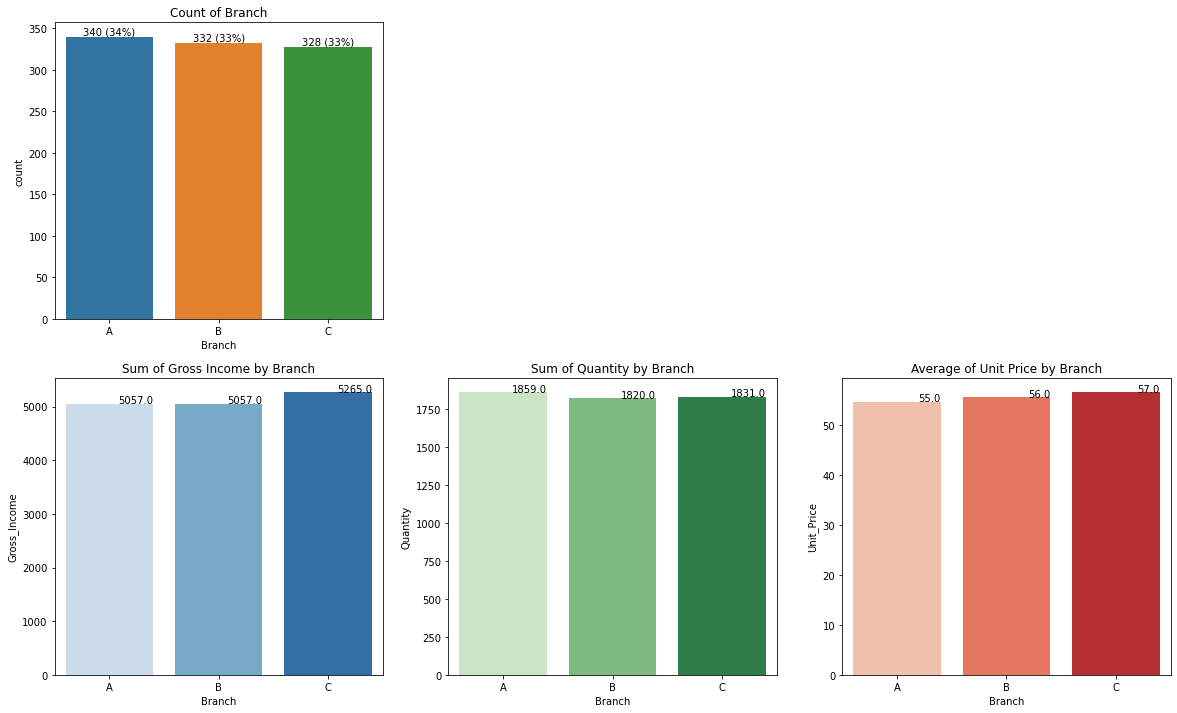

In [18]:
f, ax = plt.subplots(figsize=(20, 12))

# Count of Branch
plt.subplot(2,3,1)
title='Count of Branch'
sales=df['Branch']
draw_count(sales, title)

# Sum of 'Gross_Income' by Branch
title='Sum of Gross Income by Branch'
sales = df['Gross_Income'].groupby(df.Branch).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,3,4)
draw_bar(ind, sales, pal, title)

# Sum of 'Quantity by Branch'
title='Sum of Quantity by Branch'
sales = df['Quantity'].groupby(df.Branch).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,3,5)
draw_bar(ind, sales, pal, title)

# Average of 'Unit_Price' by Branch
title='Average of Unit Price by Branch'
sales = df['Unit_Price'].groupby(df.Branch).mean()
ind=sales.index
pal='Reds'
plt.subplot(2,3,6)
draw_bar(ind, sales, pal, title)

- Branch A makes lowest gross income. However, the number of products sold in branch A is the highest. This is likely due to the products sold in branch A has lower unit price in average, compared to the other 2 branches.
- On the other hand, we can see the unit price of products sold in branch C is the highest. Therefore, even though the quantity is lower than branch A, branch C can still makes the highest gross income.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

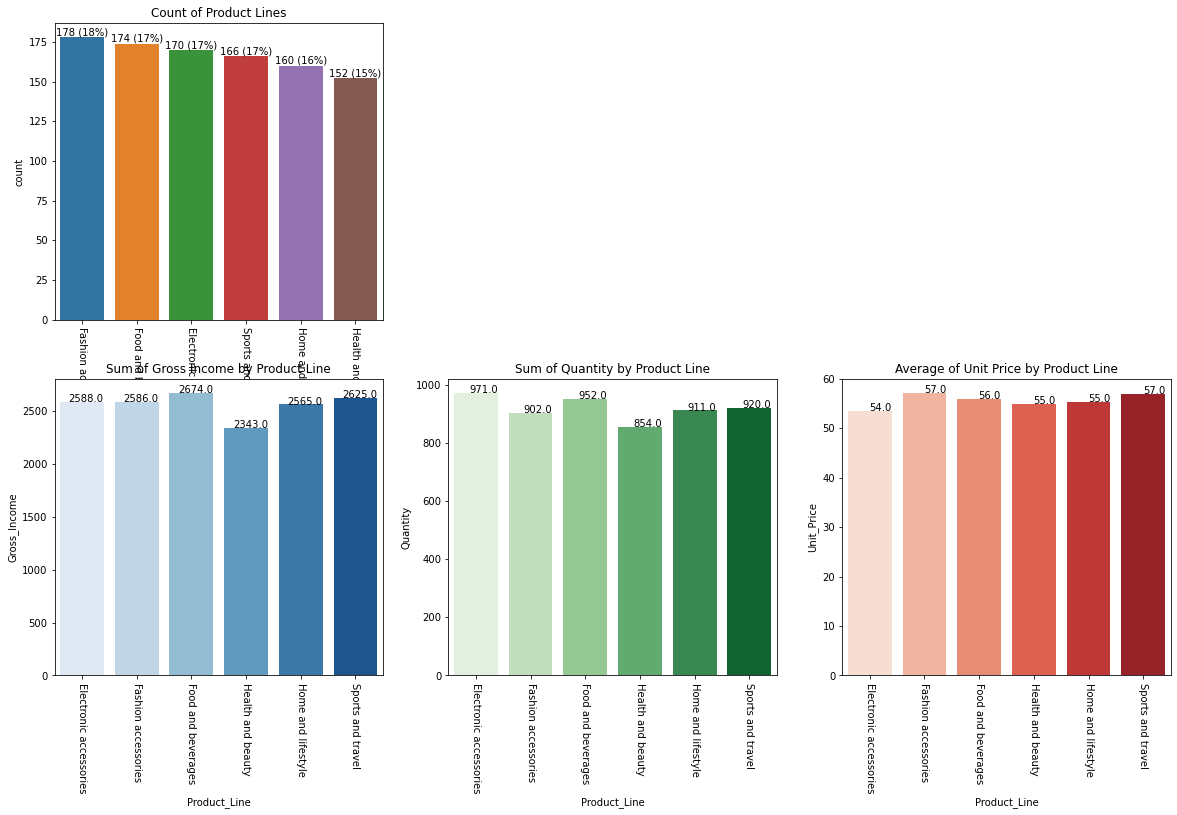

In [19]:
f, ax = plt.subplots(figsize=(20, 12))

# Count of Product_Line
plt.subplot(2,3,1)
title='Count of Product Lines'
sales=df['Product_Line']
draw_count(sales, title)
plt.xticks(rotation=270)

# Sum of 'Gross_Income' by Product_Line
title='Sum of Gross Income by Product Line'
sales = df['Gross_Income'].groupby(df.Product_Line).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,3,4)
draw_bar(ind, sales, pal, title)
plt.xticks(rotation=270)

# Sum of 'Quantity by Product_Line'
title='Sum of Quantity by Product Line'
sales = df['Quantity'].groupby(df.Product_Line).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,3,5)
draw_bar(ind, sales, pal, title)
plt.xticks(rotation=270)

# Average of 'Unit_Price' by Product_Line
title='Average of Unit Price by Product Line'
sales = df['Unit_Price'].groupby(df.Product_Line).mean()
ind=sales.index
pal='Reds'
plt.subplot(2,3,6)
draw_bar(ind, sales, pal, title)
plt.xticks(rotation=270)

- We can see 'Electronic accessories' with lowest average unit price. However, it has highest quantity and therefore, it makes third highest gross income.
- 'Fashion accessories' has 2nd lowest quantity. However, it makes almost the same gross income as 'Electronic accessories. This is very likely due to it has highest average unit price. 
- 'Sports and travel' is similar to 'Fashion accessories'. It has highest average unit prices and makes 2nd highest gross income though it has only 3rd highest quantity.
- 'Food and beverages' has 2nd highest average unit price, highest quantity, and makes highest gross income.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

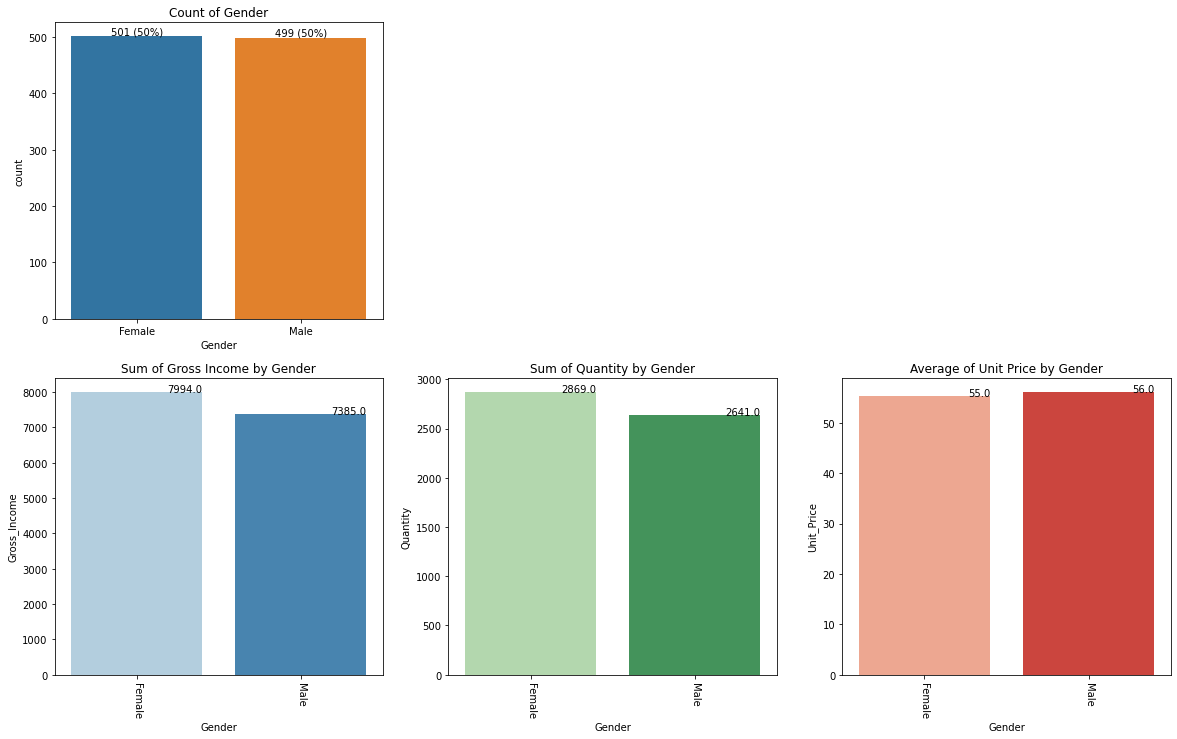

In [20]:
f, ax = plt.subplots(figsize=(20, 12))

# Count of Gender
plt.subplot(2,3,1)
title='Count of Gender'
sales=df['Gender']
draw_count(sales, title)

# Sum of 'Gross_Income' by Gender
title='Sum of Gross Income by Gender'
sales = df['Gross_Income'].groupby(df.Gender).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,3,4)
draw_bar(ind, sales, pal, title)
plt.xticks(rotation=270)

# Sum of 'Quantity by Gender'
title='Sum of Quantity by Gender'
sales = df['Quantity'].groupby(df.Gender).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,3,5)
draw_bar(ind, sales, pal, title)
plt.xticks(rotation=270)

# Average of 'Unit_Price' by Gender
title='Average of Unit Price by Gender'
sales = df['Unit_Price'].groupby(df.Gender).mean()
ind=sales.index
pal='Reds'
plt.subplot(2,3,6)
draw_bar(ind, sales, pal, title)
plt.xticks(rotation=270)

Gender has impact to the gross income. Though female and male count is almost the same, female has purchased higher quantity of products than male and thus makes higher contribution to gross income.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

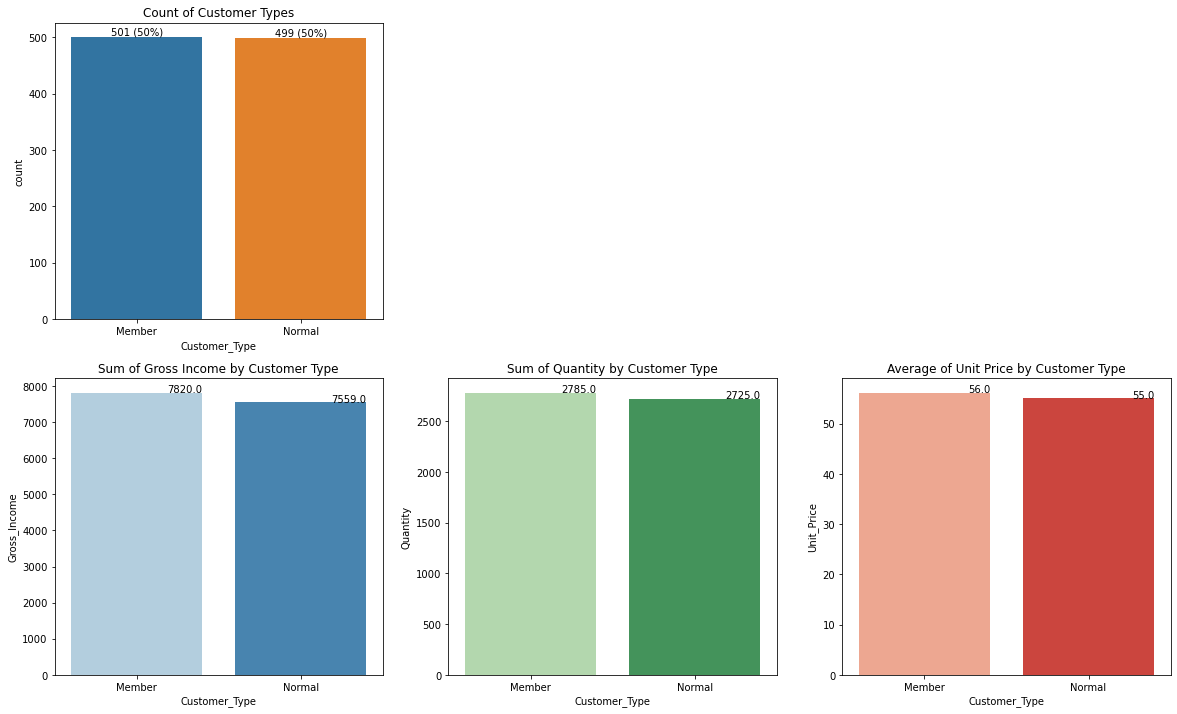

In [21]:
f, ax = plt.subplots(figsize=(20, 12))

# Count of Customer Types
plt.subplot(2,3,1)
title='Count of Customer Types'
sales=df['Customer_Type']
draw_count(sales, title)

# Sum of 'Gross_Income' by Customer_Type
title='Sum of Gross Income by Customer Type'
sales = df['Gross_Income'].groupby(df.Customer_Type).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,3,4)
draw_bar(ind, sales, pal, title)

# Sum of 'Quantity by Customer_Type'
title='Sum of Quantity by Customer Type'
sales = df['Quantity'].groupby(df.Customer_Type).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,3,5)
draw_bar(ind, sales, pal, title)

# Average of 'Unit_Price' by Customer_Type
title='Average of Unit Price by Customer Type'
sales = df['Unit_Price'].groupby(df.Customer_Type).mean()
ind=sales.index
pal='Reds'
plt.subplot(2,3,6)
draw_bar(ind, sales, pal, title)

Customer Type appears no impact to gross income.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

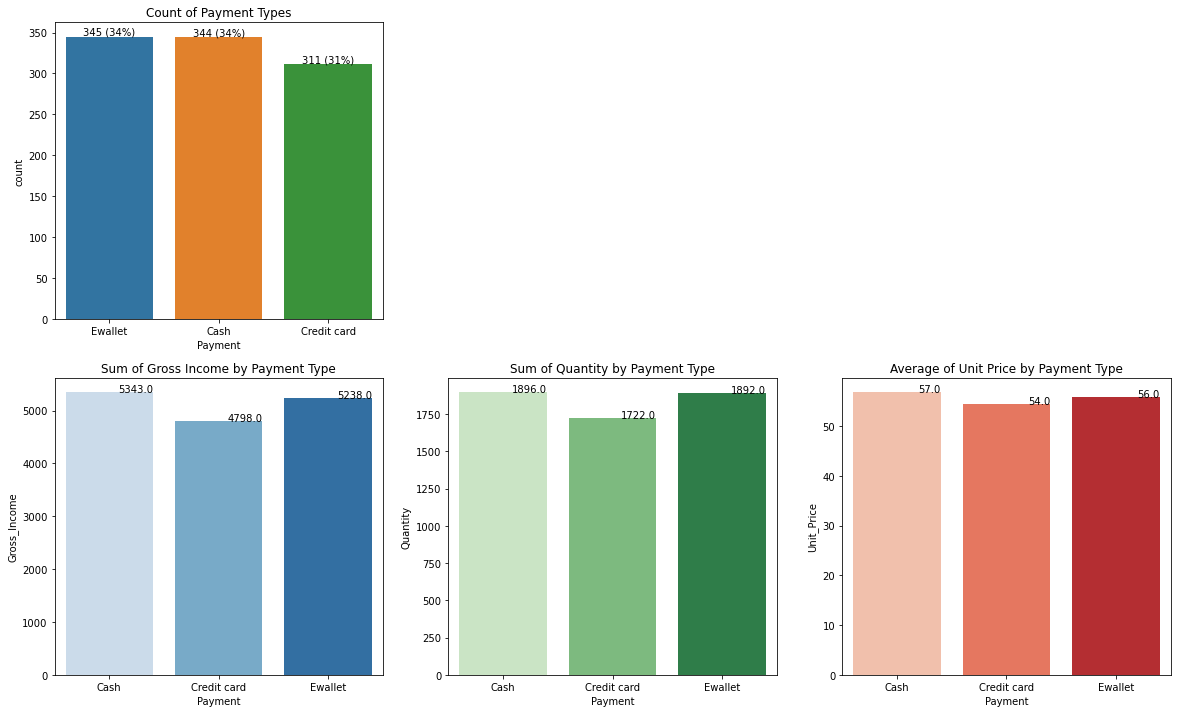

In [22]:
f, ax = plt.subplots(figsize=(20, 12))

# Count of Payment Types
plt.subplot(2,3,1)
title='Count of Payment Types'
sales=df['Payment']
draw_count(sales, title)

# Sum of 'Gross_Income' by Payment
title='Sum of Gross Income by Payment Type'
sales = df['Gross_Income'].groupby(df.Payment).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,3,4)
draw_bar(ind, sales, pal, title)

# Sum of 'Quantity' by Payment Type
title='Sum of Quantity by Payment Type'
sales = df['Quantity'].groupby(df.Payment).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,3,5)
draw_bar(ind, sales, pal, title)

# Average of 'Unit_Price' by Payment Type
title='Average of Unit Price by Payment Type'
sales = df['Unit_Price'].groupby(df.Payment).mean()
ind=sales.index
pal='Reds'
plt.subplot(2,3,6)
draw_bar(ind, sales, pal, title)

Credit card is the least popular payment method. The gross income coming from the credit card is the least.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

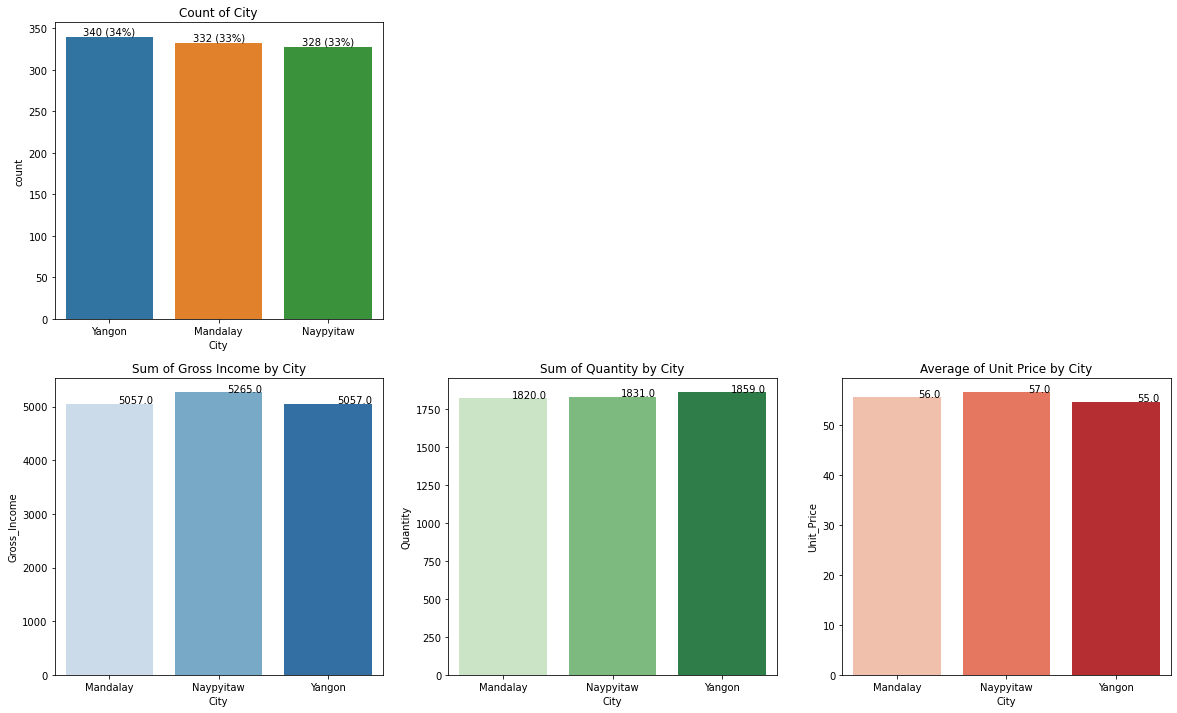

In [23]:
f, ax = plt.subplots(figsize=(20, 12))

# Count of City
plt.subplot(2,3,1)
title='Count of City'
sales=df['City']
draw_count(sales, title)

# Sum of 'Gross_Income' by City
title='Sum of Gross Income by City'
sales = df['Gross_Income'].groupby(df.City).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,3,4)
draw_bar(ind, sales, pal, title)

# Sum of 'Quantity' by City
title='Sum of Quantity by City'
sales = df['Quantity'].groupby(df.City).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,3,5)
draw_bar(ind, sales, pal, title)

# Average of 'Unit_Price' by City
title='Average of Unit Price by City'
sales = df['Unit_Price'].groupby(df.City).mean()
ind=sales.index
pal='Reds'
plt.subplot(2,3,6)
draw_bar(ind, sales, pal, title)

We can't see obvious influence of City on gross income.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


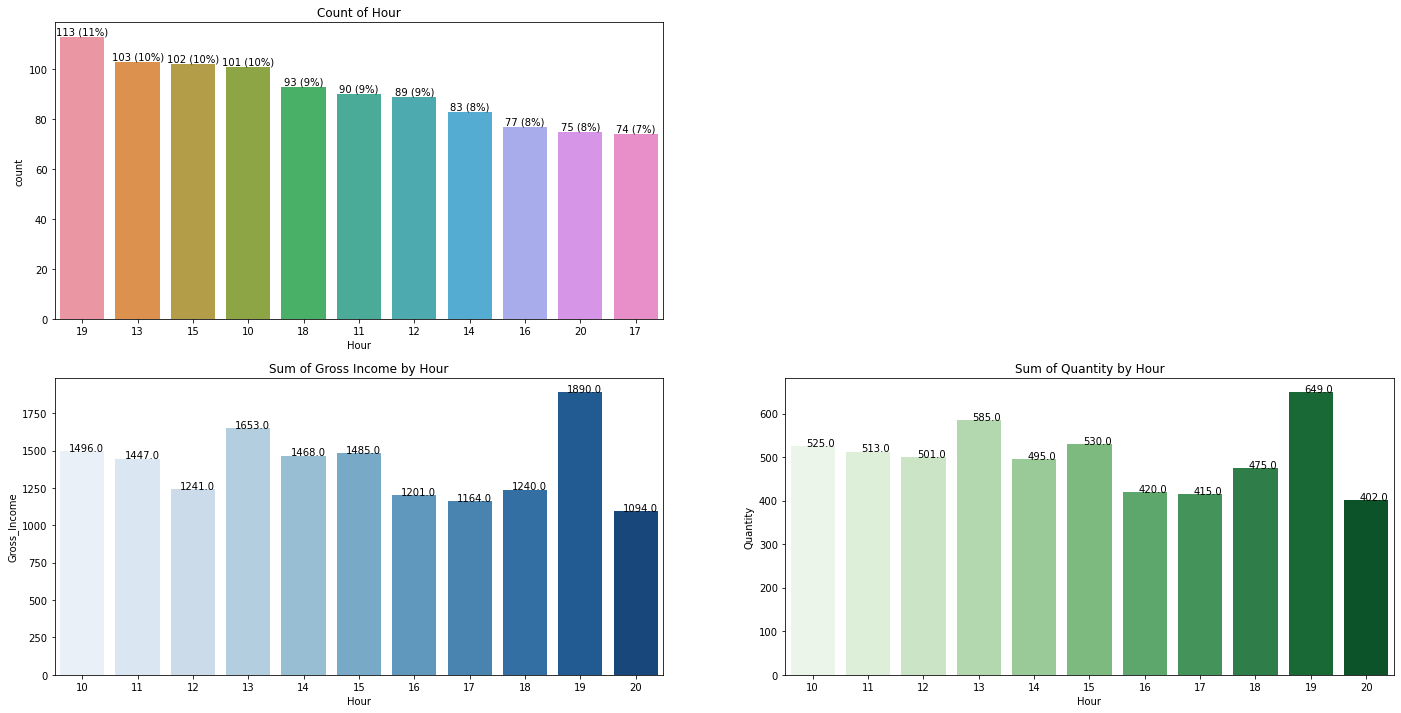

In [24]:
df['Hour']= (df['Time']).dt.hour

f, ax = plt.subplots(figsize=(24, 12))

# Count of Hour
plt.subplot(2,2,1)
title='Count of Hour'
sales=df['Hour']
draw_count(sales, title)

# Sum of 'Gross_Income' by Hour
title='Sum of Gross Income by Hour'
sales = df['Gross_Income'].groupby(df.Hour).sum()
ind=sales.index
pal='Blues'
plt.subplot(2,2,3)
draw_bar(ind, sales, pal, title)

# Sum of 'Quantity' by Hour
title='Sum of Quantity by Hour'
sales = df['Quantity'].groupby(df.Hour).sum()
ind=sales.index
pal='Greens'
plt.subplot(2,2,4)
draw_bar(ind, sales, pal, title)

We can see the hours the customers favor for purchasing products:
    
- 19:00 is the most busy hour and 13:00 is second highly busy hour. These 2 hours make the top highest and second highest gross income and quantiy separately. 
    
- 15:00, and 10:00 are also the second highly busy hours. However, unlike the hour 13:00, the hours 10:00 and 15:00 do not have relative higher gross income and quantity.

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


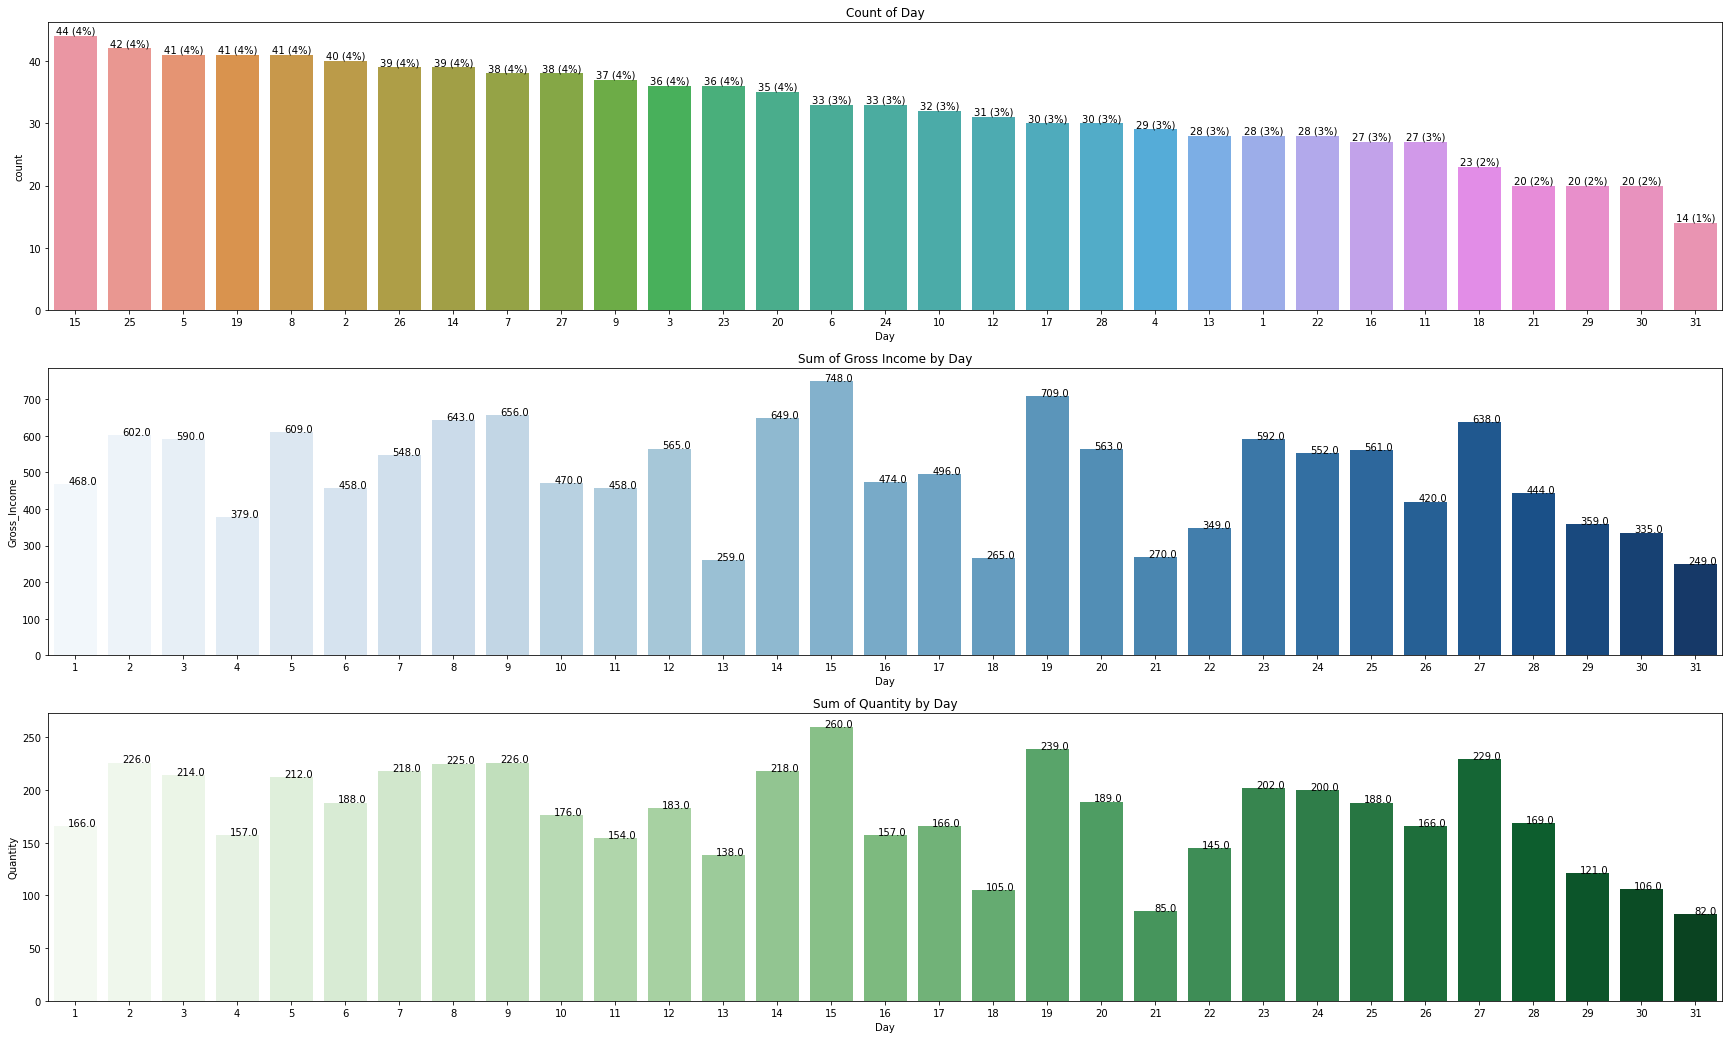

In [25]:
df['Day'] = (df['Date']).dt.day

f, ax = plt.subplots(figsize=(30, 18))

# Count of Day
plt.subplot(3,1,1)
title='Count of Day'
sales=df['Day']
draw_count(sales, title)

# Sum of 'Gross_Income' by Day
title='Sum of Gross Income by Day'
sales = df['Gross_Income'].groupby(df.Day).sum()
ind=sales.index
pal='Blues'
plt.subplot(3,1,2)
draw_bar(ind, sales, pal, title)

# Sum of 'Quantity' by Day
title='Sum of Quantity by Day'
sales = df['Quantity'].groupby(df.Day).sum()
ind=sales.index
pal='Greens'
plt.subplot(3,1,3)
draw_bar(ind, sales, pal, title)

- Day 15 is the day that customers most favor for purchasing. It also makes highest gross income and quantiy. 
- Day 25 is the secondary busy day. However, it does not make 2nd highest gross income or quantity.
- The day makes 2nd highest gross income and quantity is 19 which is top third busy day.


### <span style="color:blue">Summary of findings from EDA:</span>

    
- For correlation between numeric features:
    -  There is strong correlation of 1 in between Tax, Total, Gross_Income and Cogs i.e Cost of Goods sold with a correlation of 1.
    -  The above variables mentioned all also have good correlation of 0.63 with Quantity.

    
- For relationship between gross income and categorical features:
    - We cannot see City and Customer types have impact to gross income or quantity
    - We can see the Payement by credit card makess the least gross income. But this is simply because the least customers used credit card to pay the order.
    - We can see Branch C makes highest gross income, but least frequency of visiting. It is very likely due to the visitors tend to purchase higher unit price of products in this branch.
    - Gender has strong impact to gross income. Female customers tends to buy more products and hence contribute more gross income.
    - Different product lines have different impact to gross income. Sales of high-value product lines (i.e. with higher unit price in average) can increase gross income by higher ratio than the other product lines. Therefore, though in case their sales quantity are lower than the other product lines, they can still make higher gross income than the others.

    
- For datetime features:
    - We don't see a regular pattern to indicate the gross income is relative to the day or hour. We can see day 15 is the most busy day every month and 19:00 is the most busy hour every day, which also make highest gross income and sales quantity. However, we don't see such pattern in other days or hours.

</span>

# Build Regression Models: 
            
            - Linear Regression
            - Lasso Regression
            - Ridge Regression

### <span style='color:blue'>Summary of actions to be taken:</span>
1. Normalize the data of our target variable. We will apply 3 transformation methods and compare the result to see which one can lead the highest p-value and that will be the one we will choose to normalize our target variable in order to gain better prediction from our models. The 3 mentioned methods we are going to study are:
        
        - log transformation
        - squared root transformation
        - boxcox transformation

2. We will apply Label Encoder to convert the categorical features to numeric before we proceed to start building the models for prediction

3. We will split the data into training and testing two sets. The same two sets of data will be used for processing described in the following steps.

4. We will train and test three linear regession models:
        - Basic Linear Regression
        - Lasso Regression
        - Ridge Regression
5. We will apply KFold method to find the best params for each of the model
6. We need to perform the following steps for data standardlization:
        - Transform the data using Polynominial Features
        - Scale the data by Standard Scaling
7. After the standardization of the data is completed, we will build the 3 variation of Linear Regression models by applying the best parameters. We use Pipeline to chain the steps of data standardization and the steps of modeling with best parameters. 
8. We will train the 3 models
9. We will compare the predicted values vs. the actual values of target variable by:
        - calculating the score of our model, Root mean squred errors, and R^2 squared scores
        - Visually plot the predicted values vs. actual values

In [26]:
# Make a backup copy of the current dataset 'df'. Then, drop some columns that we would not use
df_backup=df.copy()
df.drop(labels=['Invoice_ID', 'Date', 'Time'], axis=1, inplace=True)
df.head()

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cogs,Gross_Margin_Percentage,Gross_Income,Rating,Hour,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,13,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,10,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,13,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,20,27
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,10,8


In [27]:
df.dtypes

Branch                      object
City                        object
Customer_Type               object
Gender                      object
Product_Line                object
Unit_Price                 float64
Quantity                     int64
Tax                        float64
Total                      float64
Payment                     object
Cogs                       float64
Gross_Margin_Percentage    float64
Gross_Income               float64
Rating                     float64
Hour                         int64
Day                          int64
dtype: object

#### Determine Normality
Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Therefore, we should make sure our target feature normally distributed and hence it can lead to better results. I'm going to study these three methods and choose the one that can lead highest p value for normalization of y variable. **We finally end with conlusion that log transformation can works best for normalization of our y variable.**

/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dianneliu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

Text(0.5, 1.0, 'Distribution of boxcox-Transformed Gross Income')

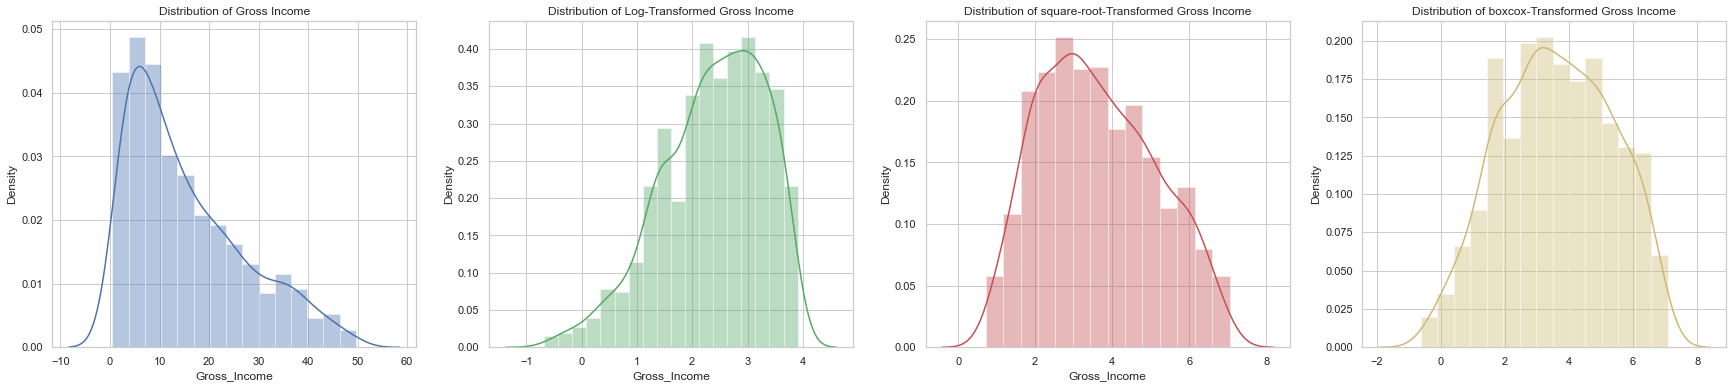

In [28]:
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(30, 6))

# No transformation
plt.subplot(1,4,1)
sns.distplot(df['Gross_Income'], kde = True, color = 'b')
plt.title('Distribution of Gross Income')

# Log transformation
plt.subplot(1,4,2)
log_Income = np.log(df.Gross_Income)
sns.distplot(log_Income, kde = True, color = 'g')
plt.title('Distribution of Log-Transformed Gross Income')

# Square root transformation
plt.subplot(1,4,3)
sqrt_Income = np.sqrt(df.Gross_Income)
sns.distplot(sqrt_Income, kde = True, color = 'r')
plt.title('Distribution of square-root-Transformed Gross Income')

# Box cox transformation
bc_result = boxcox(df.Gross_Income)
boxcox_Income = bc_result[0]
lam = bc_result[1]
plt.subplot(1,4,4)
sns.distplot(boxcox_Income, kde = True, color = 'y')
plt.title('Distribution of boxcox-Transformed Gross Income')

In [29]:
no_test_res=normaltest(df.Gross_Income.values)
log_test_res=normaltest(log_Income)
sqrt_test_res=normaltest(sqrt_Income)
boxcox_test_res=normaltest(boxcox_Income)

In [30]:
d = {'Transormation': ['No-Nomalization','Square-Root', 'Log', 'Box Cox' ], 'P-value': [no_test_res[1], sqrt_test_res[1], log_test_res[1], boxcox_test_res[1]]}
df_results = pd.DataFrame(data=d)
df_results

,Transormation,P-value
0,No-Nomalization,9.877588e-23
1,Square-Root,2.465171e-23
2,Log,6.051995e-12
3,Box Cox,2.365490e-18


We will apply log transformation to target feature as it has highest p value though it is still lower than 0.05. 

In [31]:
x=df.copy()
np.log(x['Gross_Income'])

0      3.263524
1      1.340250
2      2.785968
3      3.147938
4      3.408123
         ...   
995    0.701859
996    3.885474
997    0.464991
998    1.191191
999    3.431371
Name: Gross_Income, Length: 1000, dtype: float64

In [32]:
x.head()

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cogs,Gross_Margin_Percentage,Gross_Income,Rating,Hour,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,13,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,10,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,13,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,20,27
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,10,8


In [33]:
df.head()

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cogs,Gross_Margin_Percentage,Gross_Income,Rating,Hour,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,13,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,10,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,13,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,20,27
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,10,8


#### Convert object type of features to numerical

In [34]:
df_bk = df.copy()

# Get a list of all object types of features
cols=df.columns
categorical_cols = [cols for cols in cols if df[cols].dtype == object]

# Convert objects labels into categorical
df[categorical_cols] = df[categorical_cols].astype('category')
df.dtypes

Branch                     category
City                       category
Customer_Type              category
Gender                     category
Product_Line               category
Unit_Price                  float64
Quantity                      int64
Tax                         float64
Total                       float64
Payment                    category
Cogs                        float64
Gross_Margin_Percentage     float64
Gross_Income                float64
Rating                      float64
Hour                          int64
Day                           int64
dtype: object

In [35]:
# Converting category features into numerical using LabelEncoder

le = LabelEncoder()
for category in categorical_cols:
    le.fit(df[category].drop_duplicates())
    df[category] = le.transform(df[category])

y_col = 'Gross_Income'
feature_cols = [x for x in df.columns if x != y_col]
X = df[feature_cols]
y = df[y_col]

In [36]:
# Normalize y using log
y=np.log(y)

#### Apply KFold for cross validation. Find the best hyperparameters for modeling

In [37]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [38]:
# Basic Linear Regression, Best params and score
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    "polynomial_features__degree": range(3),
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.9843395226288817, {'polynomial_features__degree': 2})

In [39]:
# Lasso Regression, Best params and score
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "lasso_regression__alpha": np.geomspace(0.01, 30, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.9971308385465883,
 {'lasso_regression__alpha': 0.01, 'polynomial_features__degree': 3})

In [40]:
# Ridge Regression, Best params and score
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.9958536416455104,
 {'polynomial_features__degree': 3,
  'ridge_regression__alpha': 8.318124095227116})

For basic linear regression model, the best parameters is **PolynomialFeatures(degree=2), with score 0.9896303549352885**

#### Split the dataset to Traing and Test

In [41]:
# Split the dataset into train and test two sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=72018)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 700 samples.
Testing set has 300 samples.


#### Basic Linear Regression

In [42]:
best_lr_estimator = Pipeline([
                    ("Scaler", StandardScaler()),
                    ("Polynomial_Features", PolynomialFeatures(degree=2)),
                    ("Linear_Regression", LinearRegression())])

lr = best_lr_estimator.fit(X_train, y_train)
lr_score = best_lr_estimator.score(X_train, y_train)
print('Score of Linear Regression Estimator:' , lr_score)

y_train_pred_lr= lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

train_score_lr = r2_score(y_train, (y_train_pred_lr))
test_score_lr = r2_score(y_test, y_pred_lr)

train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print('Training Root Mean Squared Error:' , train_rmse_lr)
print("Testing Rooot Mean Squared Error:" , test_rmse_lr)

print ("R-Squared Train Score:", train_score_lr)
print("R-Squared Test Score:", test_score_lr)

# Predicting the charges
# Comparing the actual output values with the predicted values
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df_lr

Score of Linear Regression Estimator: 0.9907205269662486
Training Root Mean Squared Error: 0.08945442146156989
Testing Rooot Mean Squared Error: 0.11629477524314363
R-Squared Train Score: 0.9907205269662486
R-Squared Test Score: 0.9841181818577788


,Actual,Predicted
639,2.062168,2.028259
832,1.556037,1.753662
961,0.736685,0.450317
939,2.844153,2.938110
113,3.263141,3.279846
...,...,...
752,2.164472,2.170380
930,3.400397,3.424927
224,1.464412,1.270874
403,2.296315,2.245239


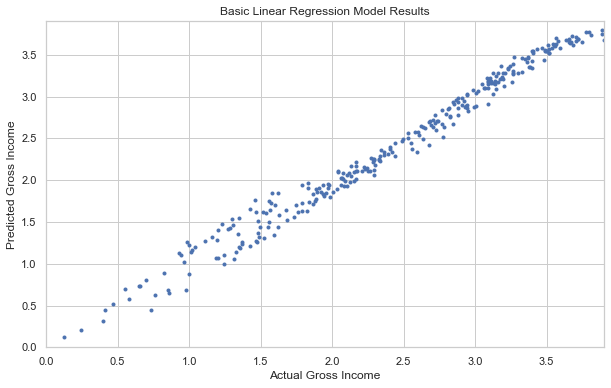

In [43]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, y_pred_lr, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Gross Income', 
       ylabel='Predicted Gross Income', 
       xlim=lim,
       ylim=lim,
       title='Basic Linear Regression Model Results');

**For both train and test data, our linear regression shows very low RMSE and R-squared value very close to 1. I would say the model can perform prediction with good accuracy.**

Note: Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

#### Lasso Regression

In [44]:
# lasso regression and K-fold cross validation
best_lasso_estimator = Pipeline([
                    ("Scaler", StandardScaler()),
                    ("Polynomial_Features", PolynomialFeatures(degree=3)),
                    ("Lasso_Regression", Lasso(alpha=0.01))])

lasso=best_lasso_estimator.fit(X_train, y_train)
lasso_score = best_lasso_estimator.score(X_train, y_train)
print('Score of Lasso Regression Estimator:' , lasso_score)

y_train_pred_lasso= lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

train_score_lasso = r2_score(y_train, (y_train_pred_lasso))
test_score_lasso = r2_score(y_test, y_pred_lasso)

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print('Training Root Mean Squared Error:' , train_rmse_lasso)
print("Testing Rooot Mean Squared Error:" , test_rmse_lasso)

print ("R-Squared Train Score:", train_score_lasso)
print("R-Squared Test Score:", test_score_lasso)

# Predicting the charges
# Comparing the actual output values with the predicted values
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
df_lasso

Score of Lasso Regression Estimator: 0.9974279612020969
Training Root Mean Squared Error: 0.04709544577297559
Testing Rooot Mean Squared Error: 0.046646370878704865
R-Squared Train Score: 0.9974279612020969
R-Squared Test Score: 0.9974448551018318


,Actual,Predicted
639,2.062168,2.073792
832,1.556037,1.566179
961,0.736685,0.681825
939,2.844153,2.839577
113,3.263141,3.234328
...,...,...
752,2.164472,2.172032
930,3.400397,3.469767
224,1.464412,1.456769
403,2.296315,2.341274


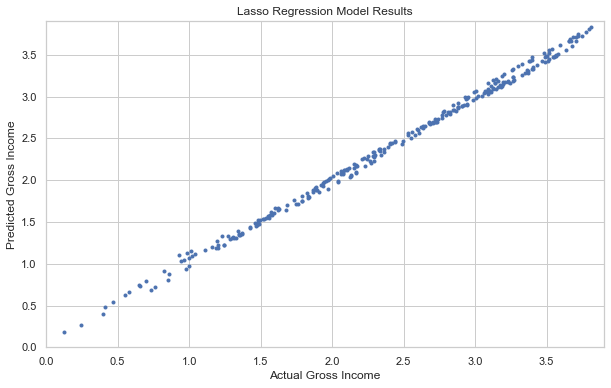

In [45]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, y_pred_lasso, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Gross Income', 
       ylabel='Predicted Gross Income', 
       xlim=lim,
       ylim=lim,
       title='Lasso Regression Model Results');

In [46]:
# lasso regression and K-fold cross validation
best_ridge_estimator = Pipeline([
                    ("Scaler", StandardScaler()),
                    ("Polynomial_Features", PolynomialFeatures(degree=3)),
                    ("Ridge_Regression", Ridge(alpha=8.318124095227116))])

ridge=best_ridge_estimator.fit(X_train, y_train)
ridge_score = best_ridge_estimator.score(X_train, y_train)
print('Score of Ridge Regression Estimator:' , ridge_score)

y_train_pred_ridge = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)

train_score_ridge = r2_score(y_train, (y_train_pred_ridge))
test_score_ridge = r2_score(y_test, y_pred_ridge)

train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print('Training Root Mean Squared Error:' , train_rmse_ridge)
print("Testing Rooot Mean Squared Error:" , test_rmse_ridge)

print ("R-Squared Train Score:", train_score_ridge)
print("R-Squared Test Score:", test_score_ridge)

# Predicting the charges
# Comparing the actual output values with the predicted values
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
df_ridge

Score of Ridge Regression Estimator: 0.9992195181312232
Training Root Mean Squared Error: 0.025943081711536923
Testing Rooot Mean Squared Error: 0.05669647359837265
R-Squared Train Score: 0.9992195181312232
R-Squared Test Score: 0.9962252177308276


,Actual,Predicted
639,2.062168,2.061454
832,1.556037,1.609931
961,0.736685,0.586562
939,2.844153,2.883141
113,3.263141,3.256087
...,...,...
752,2.164472,2.150459
930,3.400397,3.418766
224,1.464412,1.369622
403,2.296315,2.324236


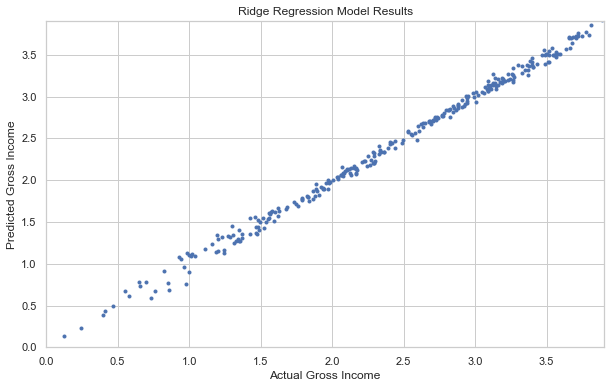

In [47]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, y_pred_ridge, 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Gross Income', 
       ylabel='Predicted Gross Income', 
       xlim=lim,
       ylim=lim,
       title='Ridge Regression Model Results');

### <span style='color:blue'>A paragraph explaining which of the regressions would be recommended as a final model that best fits the needs in terms of accuracy and explainability:</span>
- Lasso Regression is recommended as final model because it has least error (smallest RMSE) and smallest difference from actual (smallest R^2 score).

In [48]:
# assign data of lists.  
data_list = {'LinearRegression':['0.9907205269662486', '0.08945442146156989', '0.11629477524314363', '0.9907205269662486', '0.9841181818577788'], 'LassoRegression':[0.9974279612020969, 0.04709544577297559, 0.046646370878704865, 0.9974279612020969, 0.9974448551018318], 'RidgeRegression':[0.9992195181312232, 0.025943081711536923, 0.05669647359837265, 0.9992195181312232, 0.9962252177308276]}  
      
# Creates pandas DataFrame.  
data = pd.DataFrame(data_list, index =['Score_Estimator', 'Train_Root_Mean_Squared_Error', 'Test_Root_Mean_Squared_Error', 'Train_RSquared_score', 'Test_RSquared_score'])  
      
data

,LinearRegression,LassoRegression,RidgeRegression
Score_Estimator,0.9907205269662486,0.997428,0.999220
Train_Root_Mean_Squared_Error,0.08945442146156989,0.047095,0.025943
Test_Root_Mean_Squared_Error,0.11629477524314363,0.046646,0.056696
Train_RSquared_score,0.9907205269662486,0.997428,0.999220
Test_RSquared_score,0.9841181818577788,0.997445,0.996225


### <span style='color:blue'>Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression:</span>

- From EDA, we can see the quantity and unit price also has significant correlation with our target variable - gross income. The gender of customer and product lines would also have impact to gross income. 

- Not all data transformation and standardization will lead good result for building a better model. We need to test these various methods to make an appropriate selection.

- KFold is a good method for cross validation so thatn we can gain the proper hyperparameters for building our model with best performance. 

- Higher R-squared values represents smaller differences between the observed data and the fitted values. Our three models with proper hyperparameters tuning all gives high scores. However, Lasso and Ridge Regression gives higher scores than plain Linear Regression. 

- In terms of prediction accuracy of the model, we can look at the Root Mean Squared Errors (RMSE). The smaller values may represent higher prediction accuracy. It is obvious that plain Linear Regression has higher RMSE value than Lasso and Ridge. Next, when we compare Ridge and Lasso, we can see Ridge gives smaller RMSE than Lasso on train data, but higher RMSE than Lasso on test data. The RMSE given by Lasso for train and test data are almost identical. In terms of accuracy, Lasso may perform prediction better than Ridge.

- I would recommend Lasso Regression as final model.

### <span style='color:blue'> Suggestions for next steps in analyzing this data, which may include suggesting revisiting the mode adding specific data features to achieve better explanation or a better prediction:</spand>

- I would like to implement more machine learning models such as Elastics Net and compare the performance with the models I have built as above. 

- If possibly, we may also gather more information regarding to customer's income and the number of depdendents. In general, a customer has higher income, we might expect the customer would purchase more. When the customers have more dependents, the customers may purchase more for their dependents. With these data, we may need to revisit our model for prediction of gross income.

- I would also like to implement a model to predict the gross income of a specific branch. However, for better prediction, we may need to collect more data for the branch, such as the location of the branch, the public facilities and polpulation in the neiborhood of the branch ...etc. 